<a href="https://colab.research.google.com/github/faheemziker/FZValidationTextField/blob/master/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monthly Cases of Covid in UK
## Aisha Hassan
## Roll Number

## Installing Dependencies

In this Stage we are installing required dependencies mainly python libraries for elastic search and google cloud store

In [29]:

!pip install elasticsearch
!pip install google-cloud-datastore

## Extract Data From Source

In this stage of pipeline we are extracting data from data source and saving it in memory variable so that we can use it in further stages.

The original data json having main keys as country codes and we want results for UK so we are extracting key GBR and using its data array


In [30]:
import json
import requests
from datetime import datetime
result_data = requests.get("https://covid.ourworldindata.org/data/owid-covid-data.json").text
json_data = json.loads(result_data)
gbr_data=json_data["GBR"]

print(gbr_data['data'][0])

{'date': '2020-01-31', 'total_cases': 2.0, 'new_cases': 2.0, 'total_cases_per_million': 0.029, 'new_cases_per_million': 0.029, 'stringency_index': 8.33}


## Transform Data in to required Format

Here we are transforming data from original format to required format our required format is like

```
{
  "date":{'date': fulldate, 'new_cases': number, 'new_deaths': number}
}
```

In [31]:

transformed_cases_list=[]
for data in gbr_data['data']:
	transformed_cases = {}
	transformed_cases['new_deaths'] = data['new_deaths'] if "new_deaths" in data else 0
	transformed_cases['new_cases']  = data['new_cases'] if "new_cases" in data else 0
	transformed_cases['date']  		= data['date'] 
	transformed_cases_list.append(transformed_cases)

print(transformed_cases_list)

[{'new_deaths': 0, 'new_cases': 2.0, 'date': '2020-01-31'}, {'new_deaths': 0, 'new_cases': 0.0, 'date': '2020-02-01'}, {'new_deaths': 0, 'new_cases': 0.0, 'date': '2020-02-02'}, {'new_deaths': 0, 'new_cases': 6.0, 'date': '2020-02-03'}, {'new_deaths': 0, 'new_cases': 0.0, 'date': '2020-02-04'}, {'new_deaths': 0, 'new_cases': 1.0, 'date': '2020-02-05'}, {'new_deaths': 0, 'new_cases': 0.0, 'date': '2020-02-06'}, {'new_deaths': 0, 'new_cases': 0.0, 'date': '2020-02-07'}, {'new_deaths': 0, 'new_cases': 4.0, 'date': '2020-02-08'}, {'new_deaths': 0, 'new_cases': 1.0, 'date': '2020-02-09'}, {'new_deaths': 0, 'new_cases': 0.0, 'date': '2020-02-10'}, {'new_deaths': 0, 'new_cases': 1.0, 'date': '2020-02-11'}, {'new_deaths': 0, 'new_cases': 1.0, 'date': '2020-02-12'}, {'new_deaths': 0, 'new_cases': 1.0, 'date': '2020-02-13'}, {'new_deaths': 0, 'new_cases': 1.0, 'date': '2020-02-14'}, {'new_deaths': 0, 'new_cases': 0.0, 'date': '2020-02-15'}, {'new_deaths': 0, 'new_cases': 0.0, 'date': '2020-02-16

```json
{'2020-02': {'date': datetime.datetime(2020, 2, 1, 0, 0), 'total_cases': 606.0, 'total_deaths': 0, 'year_month': '2020-02'}, '2020-03': {'date': datetime.datetime(2020, 3, 1, 0, 0), 'total_cases': 283199.0, 'total_deaths': 12580.0, 'year_month': '2020-03'}, '2020-01': {'date': datetime.datetime(2020, 1, 31, 0, 0), 'total_cases': 2.0, 'total_deaths': 0, 'year_month': '2020-01'}, '2020-06': {'date': datetime.datetime(2020, 6, 1, 0, 0), 'total_cases': 8213357.0, 'total_deaths': 1182674.0, 'year_month': '2020-06'}, '2020-07': {'date': datetime.datetime(2020, 7, 1, 0, 0), 'total_cases': 9120400.0, 'total_deaths': 1270661.0, 'year_month': '2020-07'}, '2020-04': {'date': datetime.datetime(2020, 4, 1, 0, 0), 'total_cases': 3328344.0, 'total_deaths': 457216.0, 'year_month': '2020-04'}, '2020-05': {'date': datetime.datetime(2020, 5, 1, 0, 0), 'total_cases': 7016710.0, 'total_deaths': 1030749.0, 'year_month': '2020-05'}, '2021-01': {'date': datetime.datetime(2021, 1, 1, 0, 0), 'total_cases': 102180395.0, 'total_deaths': 2759728.0, 'year_month': '2021-01'}, '2021-02': {'date': datetime.datetime(2021, 2, 1, 0, 0), 'total_cases': 113211684.0, 'total_deaths': 3272231.0, 'year_month': '2021-02'}, '2020-08': {'date': datetime.datetime(2020, 8, 1, 0, 0), 'total_cases': 9933759.0, 'total_deaths': 1284798.0, 'year_month': '2020-08'}, '2020-09': {'date': datetime.datetime(2020, 9, 1, 0, 0), 'total_cases': 11564506.0, 'total_deaths': 1254505.0, 'year_month': '2020-09'}, '2021-04': {'date': datetime.datetime(2021, 4, 1, 0, 0), 'total_cases': 43763200.0, 'total_deaths': 1271445.0, 'year_month': '2021-04'}, '2020-12': {'date': datetime.datetime(2020, 12, 1, 0, 0), 'total_cases': 61365366.0, 'total_deaths': 2042273.0, 'year_month': '2020-12'}, '2020-11': {'date': datetime.datetime(2020, 11, 1, 0, 0), 'total_cases': 40830975.0, 'total_deaths': 1573977.0, 'year_month': '2020-11'}, '2021-03': {'date': datetime.datetime(2021, 3, 1, 0, 0), 'total_cases': 132721966.0, 'total_deaths': 3896724.0, 'year_month': '2021-03'}, '2020-10': {'date': datetime.datetime(2020, 10, 1, 0, 0), 'total_cases': 22002570.0, 'total_deaths': 1358294.0, 'year_month': '2020-10'}}
```

## Load Data in Elastic Search

Here we are saving data in our analytic tool elastic search for visualization using kibana

In [32]:
from elasticsearch import Elasticsearch 

url="https://observability-deployment-aa59a9.es.us-west1.gcp.cloud.es.io:9243"

es = Elasticsearch(
    [url],
    http_auth=('elastic', 'eaFKh2iO2zzGGLKDPfFqagX1')    
)

for transformed_cases in transformed_cases_list:		
	res = es.index(index="covid-index-1", body=transformed_cases)

## Visualization
For visualizations we are using kibana tool which fetch data from our elastics
We created a index `covid-index-1 ` using which we created a dashboard in kibana and created a graph.
graph horizontal axis contains the dates and on vertical axis we shown new cases and new deaths.

You can also see live running kibana i setup for my testing
https://observability-deployment-aa59a9.kb.us-west1.gcp.cloud.es.io:9243/goto/c3d3f7cfbda130fedf7cc8ae2d1b5656


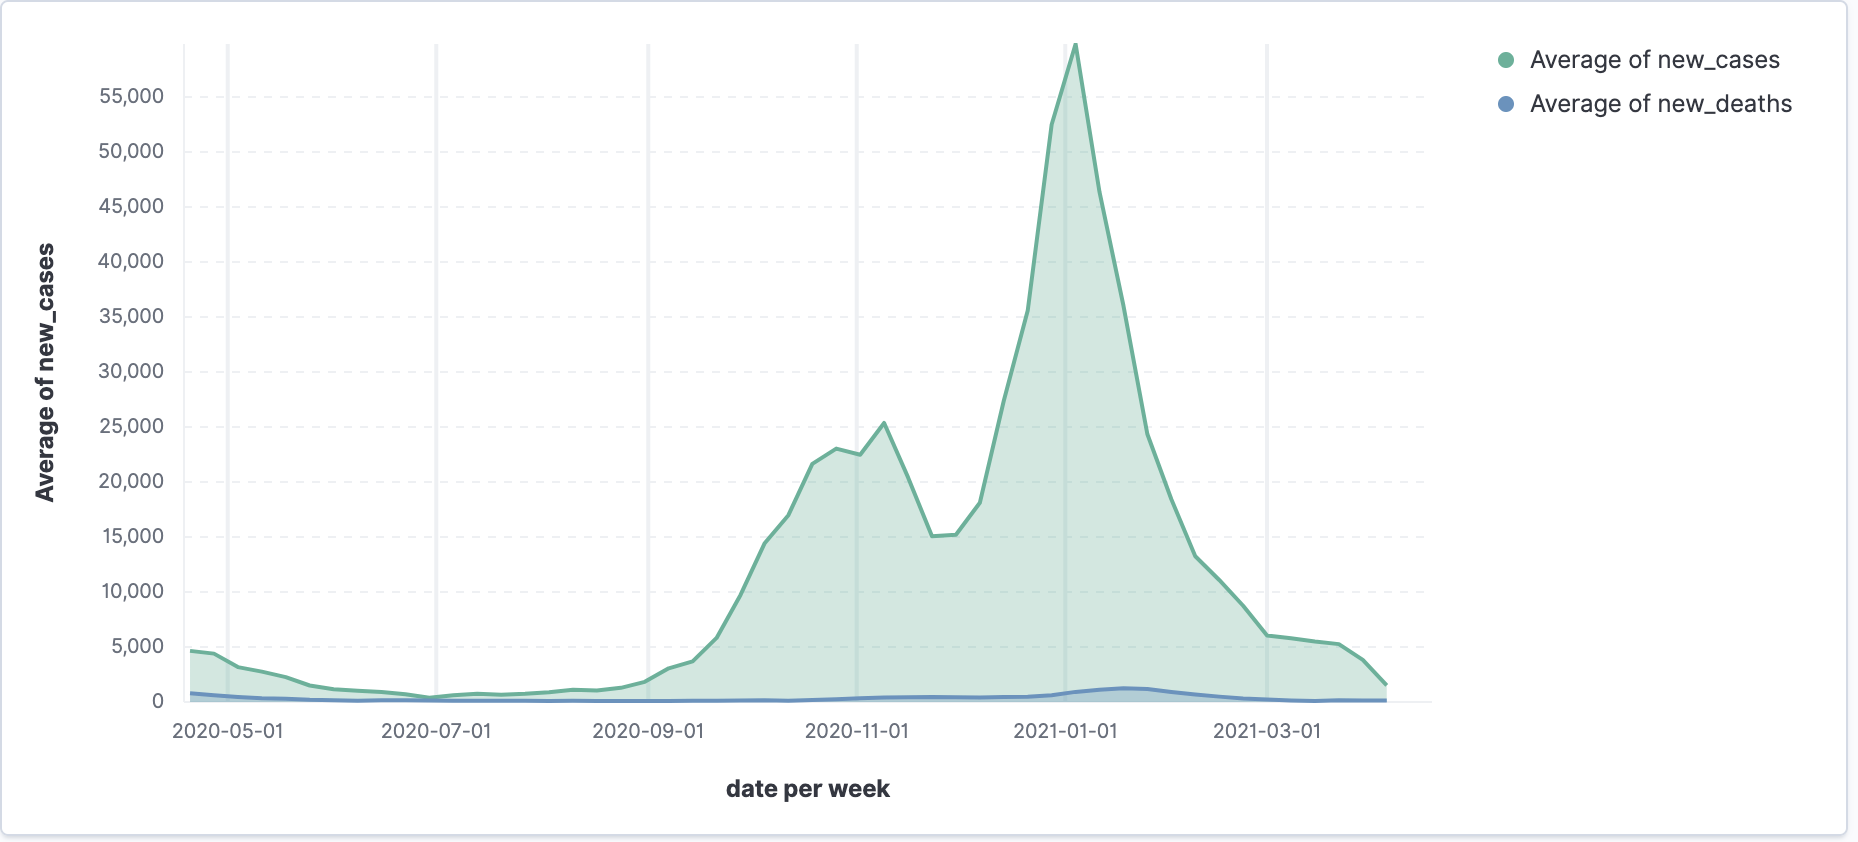

## Load Data in Google Data Store
Her we are saving our data as permenant storage using google data store

In [33]:
from google.cloud import datastore
from google.colab import auth
auth.authenticate_user()
project_id='ccws-ayesha'
!gcloud config set project {project_id}


client = datastore.Client(project_id)
for transformed_cases in transformed_cases_list:
    key = client.key('EntityKind', transformed_cases['date'])
    entity = datastore.Entity(key=key)
    entity.update(data)
    client.put(entity)


Updated property [core/project].
